<a href="https://colab.research.google.com/github/shambhavi2703/spotify_analysis/blob/main/spotify_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPOTIFY MUSIC ANALYZER APP


>This app allows you to gain insights into your music preferences and listening habits by analyzing your public playlist that you provide. By analyzing various audio features of the songs in your playlist, such as valence, energy, danceability, loudness, speechiness, instrumentalness, liveness, acousticness, and Spotify API, our app can provide valuable insights into your music preferences and help you discover new music that you might enjoy.











In [120]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

Replace  "your client_id" and "client_secret" with client id and client secret , which can be easily obtained from spotify devloper profile.

In [121]:
client_credentials_manager = SpotifyClientCredentials(client_id="your client_id",
                                                      client_secret="your client_id")


In [122]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



This promts the user to enter a public playlist 

In [123]:
# Prompt the user to input a Spotify playlist link
playlist_link = input('Please enter a Spotify playlist link: ')


Please enter a Spotify playlist link: https://open.spotify.com/playlist/1KK6vwzWgYuiqxr6IhNWHh


In [124]:
# Extract the playlist ID from the link
playlist_id = playlist_link.split('/')[-1]

In [79]:
# Retrieve the playlist information and its tracks using the Spotify Web API
results = sp.playlist_items(playlist_id)
tracks = results['items']



In [80]:
for track in tracks:
    artist = track['track']['artists'][0]['name']
    artists.append(artist)
    track_info = sp.track(track['track']['id'])
    if 'genres' in track_info['album']:
        track_genres = track_info['album']['genres']
        if len(track_genres) > 0:
            genres.extend(track_genres)



Generate top 10 artists from the playlist

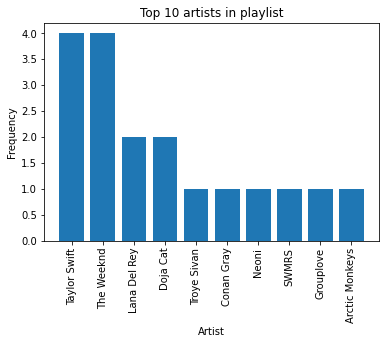

In [125]:
# Generate a chart of the most repeated artists in the playlist
top_artists = Counter(artists).most_common(10)
x, y = zip(*top_artists)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Top 10 artists in playlist')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.show()

In [126]:
# Extract the artists and genres of the tracks in the playlist
artists = []
genres = []
for track in tracks:
    artist = track['track']['artists'][0]['name']
    artists.append(artist)
    track_info = sp.track(track['track']['id'])
    track_genres = track_info['album'].get('genres', [])
    if len(track_genres) > 0:
        genres.extend(track_genres)


In [127]:
# Analyze the playlist's general mood (e.g. happy, sad, energetic, etc.)
# You can use audio features such as valence, energy, and danceability to determine mood
playlist_features = sp.audio_features([track['track']['id'] for track in tracks])
valence = [feature['valence'] for feature in playlist_features]
energy = [feature['energy'] for feature in playlist_features]
danceability = [feature['danceability'] for feature in playlist_features]
avg_valence = sum(valence) / len(valence)
avg_energy = sum(energy) / len(energy)
avg_danceability = sum(danceability) / len(danceability)

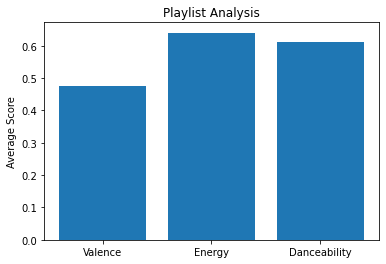

In [128]:
# Plot a graph for the average valence, energy, and danceability
labels = ['Valence', 'Energy', 'Danceability']
values = [avg_valence, avg_energy, avg_danceability]
plt.bar(labels, values)
plt.ylabel('Average Score')
plt.title('Playlist Analysis')
plt.show()

This essentially uses the features of music to draw insights about the mood of the user.

In [129]:
# print the mood of the playlist
if avg_valence > 0.5 and avg_energy > 0.5:
    print("The playlist has a positive and upbeat mood.")
    seed_genres = ['pop', 'rock', 'dance']
elif avg_valence > 0.5 and avg_energy < 0.5:
    print("The playlist has a positive but calm mood.")
    seed_genres = ['acoustic', 'chill']
elif avg_valence < 0.5 and avg_energy > 0.5:
    print("The playlist has a negative but intense mood.")
    seed_genres = ['metal', 'punk']
else:
    print("The playlist has a negative and calm mood.")
    seed_genres = ['classical', 'jazz']

The playlist has a negative but intense mood.


This recomends some songs based on the most prefered genres of music from the playlist

In [130]:
results = sp.recommendations(seed_genres=seed_genres, limit=10)
print("Recommended songs:")
for track in results['tracks']:
    print(track['name'] + ' - ' + track['artists'][0]['name'])

Recommended songs:
Enter Sandman - Metallica
Heaven and Hell - Black Sabbath
Windspitting Punk - Swingin' Utters
Eleven To Your Seven - Hey Mercedes
Stranglehold - Ted Nugent
Suburban Home - Descendents
L'enfant sauvage - Gojira
Still Counting - Volbeat
Paradise (What About Us?) [Feat. Tarja] - Within Temptation
How to Screw up Your Future and Disappoint Your Loved Ones - Settle Your Scores


In [131]:
# Get the top artists in the playlist
top_artists = Counter(artists).most_common(10)

# Iterate through the top artists and get more information about each one
for artist, count in top_artists:
    # Get the artist's Spotify ID
    results = sp.search(q='artist:' + artist, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
        artist_id = items[0]['id']
        # Get the artist's genres and popularity
        artist_info = sp.artist(artist_id)
        artist_genres = artist_info['genres']
        artist_popularity = artist_info['popularity']
        # Print the artist's name, number of songs in the playlist, genres, and popularity
        print(f"{artist} ({count} songs): {artist_genres} (Popularity: {artist_popularity})")


Taylor Swift (4 songs): ['pop'] (Popularity: 100)
The Weeknd (4 songs): ['canadian contemporary r&b', 'canadian pop', 'pop'] (Popularity: 98)
Lana Del Rey (2 songs): ['art pop', 'pop'] (Popularity: 92)
Doja Cat (2 songs): ['dance pop', 'pop'] (Popularity: 89)
Troye Sivan (1 songs): ['australian pop', 'dance pop', 'pop', 'viral pop'] (Popularity: 77)
Conan Gray (1 songs): ['bedroom pop', 'pop'] (Popularity: 83)
Neoni (1 songs): ['alt z'] (Popularity: 71)
SWMRS (1 songs): ['oakland indie'] (Popularity: 46)
Grouplove (1 songs): ['indie pop', 'indie poptimism', 'indie rock', 'indietronica', 'la indie', 'modern alternative rock', 'modern rock', 'rock', 'stomp and holler'] (Popularity: 66)
Arctic Monkeys (1 songs): ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie'] (Popularity: 89)


This provided the user with more information about the user`s favourtite artist.

In [132]:
# Get information about the top artists in the playlist
for artist_name in top_artists:
    # Search for the artist on Spotify
    results = sp.search(q=artist_name, type='artist', limit=1)
    if len(results['artists']['items']) > 0:
        artist = results['artists']['items'][0]
        print(f"\n{artist['name']} (Popularity: {artist['popularity']})")
        
        # Print some of the artist's latest tracks
        top_tracks = sp.artist_top_tracks(artist['id'], country='US')
        print("Some more new songs from your favorite artist:")
        for track in top_tracks['tracks'][:3]:
            print(f"- {track['name']}")

        # Print the artist's most popular track
        top_track = sp.artist_top_tracks(artist['id'])['tracks'][0]
        print(f"\nThe most popular song from your favorite artist is '{top_track['name']}'")
        
        # Show the artist's page on Spotify
        print(f"\nListen to more from {artist['name']} on Spotify: {artist['external_urls']['spotify']}")



Taylor Swift (Popularity: 100)
Some more new songs from your favorite artist:
- Anti-Hero
- Lavender Haze
- Midnight Rain

The most popular song from your favorite artist is 'Anti-Hero'

Listen to more from Taylor Swift on Spotify: https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02

The Weeknd (Popularity: 98)
Some more new songs from your favorite artist:
- Creepin' (with The Weeknd & 21 Savage)
- Die For You
- Starboy

The most popular song from your favorite artist is 'Creepin' (with The Weeknd & 21 Savage)'

Listen to more from The Weeknd on Spotify: https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ

Lana Del Rey (Popularity: 92)
Some more new songs from your favorite artist:
- Summertime Sadness
- Snow On The Beach (feat. Lana Del Rey)
- Young And Beautiful

The most popular song from your favorite artist is 'Summertime Sadness'

Listen to more from Lana Del Rey on Spotify: https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa

Doja Cat (Popularity: 89)
Some more new so

Genertaes a word cloud of top artists

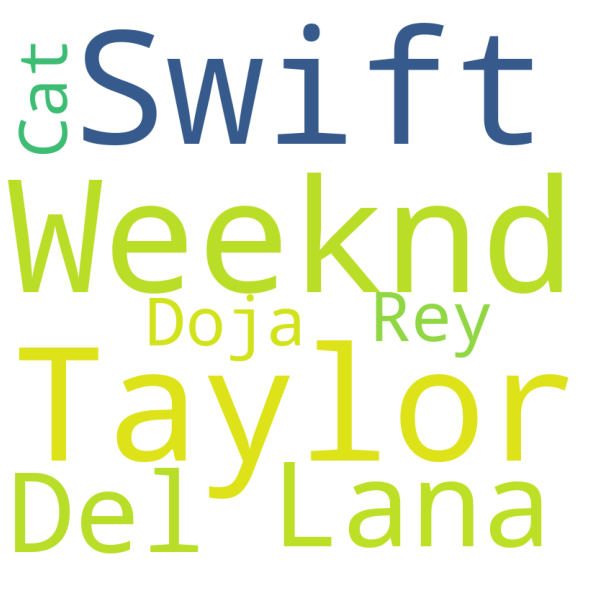

In [133]:
top_artists = [artist for artist in artists if artists.count(artist) >= 2]
all_artists = ' '.join(top_artists)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_artists)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

ANALYSIS OF  MORE FEATURES FROM THE PLAYLIST 


In [172]:
# Initialize lists to store audio feature values
loudness_values = []
speechiness_values = []
instrumentalness_values = []
liveness_values = []
acousticness_values = []


In [173]:
# Loop through each track in the playlist and retrieve its audio features
for track in tracks:
    # Retrieve artist name and track ID
    artist = track['track']['artists'][0]['name']
    track_id = track['track']['id']
    
    # Retrieve track audio features
    features = sp.audio_features(track_id)[0]
    
    # Append audio feature values to respective lists
    loudness_values.append(features['loudness'])
    speechiness_values.append(features['speechiness'])
    instrumentalness_values.append(features['instrumentalness'])
    liveness_values.append(features['liveness'])
    acousticness_values.append(features['acousticness'])
  
    


In [174]:
# Compute the average value of each audio feature
loudness_avg = sum(loudness_values) / len(loudness_values)
speechiness_avg = sum(speechiness_values) / len(speechiness_values)
instrumentalness_avg = sum(instrumentalness_values) / len(instrumentalness_values)
liveness_avg = sum(liveness_values) / len(liveness_values)
acousticness_avg = sum(acousticness_values) / len(acousticness_values)


In [177]:
# Print out the average value of each audio feature
print(f"Loudness: {loudness_avg} dB")
print(f"Speechiness: {speechiness_avg}")
print(f"Instrumentalness: {instrumentalness_avg}")
print(f"Liveness: {liveness_avg}")
print(f"Acousticness: {acousticness_avg}")

Loudness: 6.813184210526316 dB
Speechiness: 0.08564473684210526
Instrumentalness: 0.028497414473684212
Liveness: 0.18709473684210523
Acousticness: 0.18574957894736843


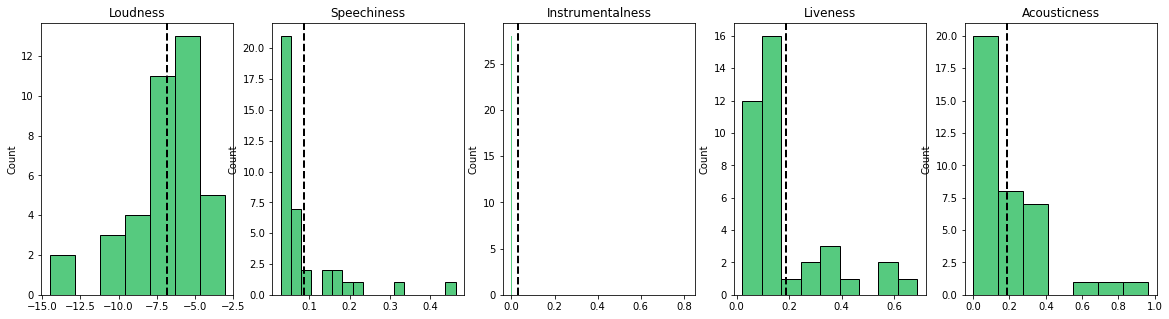

In [192]:
# Generate bar chart visualizations of each audio feature
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs = axs.ravel()

# Loudness bar chart
sns.histplot(loudness_values, ax=axs[0], color='#1DB954')
axs[0].axvline(loudness_avg, color='black', linestyle='dashed', linewidth=2)
axs[0].set_title('Loudness')

# Speechiness bar chart
sns.histplot(speechiness_values, ax=axs[1], color='#1DB954')
axs[1].axvline(speechiness_avg, color='black', linestyle='dashed', linewidth=2)
axs[1].set_title('Speechiness')

# Instrumentalness bar chart
sns.histplot(instrumentalness_values, ax=axs[2], color='#1DB954')
axs[2].axvline(instrumentalness_avg, color='black', linestyle='dashed', linewidth=2)
axs[2].set_title('Instrumentalness')

# Liveness bar chart
sns.histplot(liveness_values, ax=axs[3], color='#1DB954')
axs[3].axvline(liveness_avg, color='black', linestyle='dashed', linewidth=2)
axs[3].set_title('Liveness')

# Acousticness bar chart
sns.histplot(acousticness_values, ax=axs[4], color='#1DB954')
axs[4].axvline(acousticness_avg, color='black', linestyle='dashed', linewidth=2)
axs[4].set_title('Acousticness')

plt.show()


In [194]:
if loudness_avg > -10:
    print("You seem to prefer energetic and louder music.")
elif loudness_avg < -20:
    print("You seem to prefer quieter and more mellow music.")
else:
    print("Your music preferences do not strongly indicate a preference for either energetic or mellow music.")

if speechiness_avg > 0.33:
    print("You seem to prefer music with more spoken word elements.")
elif speechiness_avg < 0.1:
    print("You seem to prefer music with less spoken word elements.")
else:
    print("Your music preferences do not strongly indicate a preference for either spoken word or instrumental music.")

if instrumentalness_avg > 0.5:
    print("You seem to prefer music with less vocal elements.")
elif instrumentalness_avg < 0.1:
    print("You seem to prefer music with more vocal elements.")
else:
    print("Your music preferences do not strongly indicate a preference for either vocal or instrumental music.")

if liveness_avg > 0.3:
    print("You seem to prefer live performances.")
elif liveness_avg < 0.1:
    print("You seem to prefer studio recordings.")
else:
    print("Your music preferences do not strongly indicate a preference for either live or studio recordings.")

if acousticness_avg > 0.5:
    print("You seem to prefer music with more acoustic elements.")
elif acousticness_avg < 0.1:
    print("You seem to prefer music with more electronic or synthetic elements.")
else:
    print("Your music preferences do not strongly indicate a preference for either acoustic or electronic/synthetic music.")


You seem to prefer energetic and louder music.
You seem to prefer music with less spoken word elements.
You seem to prefer music with more vocal elements.
Your music preferences do not strongly indicate a preference for either live or studio recordings.
Your music preferences do not strongly indicate a preference for either acoustic or electronic/synthetic music.


for suggestions and feedback feel free to reach out to me 
Shambhavi 
email : shambhavivats2703@gmail.com
